## Plot the footprint from LOFAR and SKA using NuRadio

In [10]:
import logging
from NuRadioReco.utilities.logging import set_general_log_level

import argparse
import time
import datetime
import numpy as np
import matplotlib.pyplot as plt

import NuRadioReco.detector.detector
# import NuRadioReco.modules.LOFAR.hardwareResponseIncorporator
import NuRadioReco.modules.channelGalacticNoiseAdder
import NuRadioReco.modules.channelGenericNoiseAdder
import NuRadioReco.modules.channelResampler
import NuRadioReco.modules.efieldToVoltageConverter
import NuRadioReco.modules.io.coreas
from NuRadioReco.modules.io.coreas import coreas
import NuRadioReco.modules.io.coreas.readCoREASDetector
from NuRadioReco.detector.detector import Detector
from NuRadioReco.detector.SKA.detector import Detector as SKADetector
from NuRadioReco.modules import voltageToEfieldConverter
import NuRadioReco.modules.io.eventWriter
from NuRadioReco.framework.parameters import stationParameters, channelParameters
from NuRadioReco.framework.parameters import showerParameters as shp
from NuRadioReco.framework.parameters import electricFieldParameters as efp
from NuRadioReco.utilities import units
import NuRadioReco.modules.electricFieldSignalReconstructor


 # Set log level of this script
set_general_log_level(logging.ERROR)  # Setup general logging level (before imports to get nice formatting everywhere)


lowfreq = 30 * units.MHz
highfreq = 80 * units.MHz

In [11]:
path_to_files = "/home/kwatanabe/Projects/radio-ift/resources/lofar/hdf5_sims"
event_id = "60016870/2"
sim_primary = "proton"
sim_file = "SIM000010.hdf5"

detector = "lofar"

path_to_sim_file = f"{path_to_files}/{event_id}/{sim_primary}/{sim_file}"

In [12]:
sampling_rate = 1 * units.GHz
station_time = datetime.datetime(2025, 2, 1, 0, 0, 0)

core_list = [np.array([0, 0, 0])]

long_trace = False
caching_efVT = True
caching_cGNA = True

if detector == "lofar":
    det = Detector("LOFAR/LOFAR.json", source="json", antenna_by_depth=False)
    det.update(station_time)

    selected_station_channel_ids = {}
    for staid in [1, 2, 3, 4, 5, 6, 7]:
        selected_station_channel_ids[staid] = det.get_channel_ids(staid)

elif detector == "ska":
    decimation = 4

    # load detector:
    det = SKADetector(
        '/home/kwatanabe/Projects/radio-ift/resources/ska/ska_layout/Vogel/telescope.tm',
        maximum_radius=500 * units.m
        )

    selected_station_channel_ids = {}
    for staid in det.get_station_ids():
        selected_station_channel_ids[staid] = np.sort(np.concatenate([det.get_channel_ids(staid)[0::2][::decimation], 
                                                                    det.get_channel_ids(staid)[1::2][::decimation]])) #select every [dezimation]th antenna, but keep channel pair
# resample to 1 GHz
resampler = NuRadioReco.modules.channelResampler.channelResampler()
resampler.begin()

electricFieldSignalReconstructor = NuRadioReco.modules.electricFieldSignalReconstructor.electricFieldSignalReconstructor()
electricFieldSignalReconstructor.begin()

# module to read the CoREAS file and convert it to NuRadioReco event for an array of detector stations.
readCoREASDetector = NuRadioReco.modules.io.coreas.readCoREASDetector.readCoREASDetector()
evt = coreas.read_CORSIKA7(path_to_sim_file, site=detector)
evt.get_first_sim_shower().set_parameter(
    shp.core, np.array([0,0,evt.get_first_sim_shower().get_parameter(shp.observation_level)])
)

interpolator = NuRadioReco.modules.io.coreas.coreasInterpolator.coreasInterpolator(evt)
interpolator.initialize_efield_interpolator(interp_lowfreq=lowfreq, interp_highfreq=highfreq)
readCoREASDetector.coreas_interpolator = interpolator  # skip begin() function because HDF5 does not have good CoreCoordinateVertical
readCoREASDetector._readCoREASDetector__corsika_evt = evt

(20,) (20, 5)
(20,) (20, 5)
(20,) (20, 5)
(20,) (20, 5)
(20,) (20, 5)
(20,) (20, 5)
(20,) (20, 5)
(20,) (20, 5)
(20,) (20, 5)
(20,) (20, 5)
(20,) (20, 5)
(20,) (20, 5)
(20,) (20, 5)
(20,) (20, 5)
(20,) (20, 5)
(20,) (20, 5)
(20,) (20, 5)
(20,) (20, 5)
(20,) (20, 5)
(20,) (20, 5)
(20,) (20, 5)
(20,) (20, 5)
(20,) (20, 5)
(20,) (20, 5)
(20,) (20, 5)
(20,) (20, 5)
(20,) (20, 5)
(20,) (20, 5)
(20,) (20, 5)
(20,) (20, 5)
(20,) (20, 5)
(20,) (20, 5)
(20,) (20, 5)
(20,) (20, 5)
(20,) (20, 5)
(20,) (20, 5)
(20,) (20, 5)
(20,) (20, 5)
(20,) (20, 5)
(20,) (20, 5)
(20,) (20, 5)
(20,) (20, 5)
(20,) (20, 5)
(20,) (20, 5)
(20,) (20, 5)
(20,) (20, 5)
(20,) (20, 5)
(20,) (20, 5)
(20,) (20, 5)
(20,) (20, 5)
(20,) (20, 5)
(20,) (20, 5)
(20,) (20, 5)
(20,) (20, 5)
(20,) (20, 5)
(20,) (20, 5)
(20,) (20, 5)
(20,) (20, 5)
(20,) (20, 5)
(20,) (20, 5)
(20,) (20, 5)
(20,) (20, 5)
(20,) (20, 5)
(20,) (20, 5)
(20,) (20, 5)
(20,) (20, 5)
(20,) (20, 5)
(20,) (20, 5)
(20,) (20, 5)
(20,) (20, 5)
(20,) (20, 5)
(20,) 

In [13]:
t0 = time.time()

for eid, event in enumerate(readCoREASDetector.run(det, core_list, selected_station_channel_ids)):
    
    
    #event.set_parameter(showerParameters.core, np.array([0.0, 0.0, 0.0]))

    for station in event.get_stations():
        ts0 = time.time()
        station.set_station_time(station_time)
        sim_station = station.get_sim_station()
        zenith = sim_station[stationParameters.zenith] 
        azimuth = sim_station[stationParameters.azimuth]

        print(zenith)

        station.set_parameter(stationParameters.zenith, zenith)
        station.set_parameter(stationParameters.azimuth, azimuth)
        station.set_parameter(stationParameters.triggered, True)
        station.set_is_cosmic_ray()
        
        print(f"station {station.get_id()}")

        field = sim_station.get_electric_fields()[0]
        print(f"efield trace shape: {field.get_trace().shape}")
        print(f"efield trace_start_time: {field.get_trace_start_time()}")

       

        # electricFieldSignalReconstructor.run(evt, sim_station, det)

        


0.4693685342296385
station 1
efield trace shape: (3, 4082)
efield trace_start_time: 203.40585401924844
0.4693685342296385
station 2
efield trace shape: (3, 4082)
efield trace_start_time: -212.58510138095514
0.4693685342296385
station 3
efield trace shape: (3, 4082)
efield trace_start_time: -178.7562824551788
0.4693685342296385
station 4
efield trace shape: (3, 4082)
efield trace_start_time: -81.00029844806276
0.4693685342296385
station 5
efield trace shape: (3, 4082)
efield trace_start_time: -198.80336539313944
0.4693685342296385
station 6
efield trace shape: (3, 4082)
efield trace_start_time: -400.66616686062633
0.4693685342296385
station 7
efield trace shape: (3, 4082)
efield trace_start_time: -359.300771732871


In [14]:
from NuRadioReco.utilities.trace_utilities import get_electric_field_energy_fluence

In [15]:
fluences = []
positions = []
for staid in selected_station_channel_ids.keys():
    station = event.get_station(staid)
    try:
        for chid in selected_station_channel_ids[staid]:
            sim_station = station.get_sim_station()
            efields = sim_station.get_electric_fields()
            for efield in efields:
                chid_efield = efield.get_unique_identifier()[0][0]
                if chid != chid_efield:
                    print(f"Channel ID mismatch: {chid} != {chid_efield}")
                    continue
                trace = efield.get_trace()
                fluence = get_electric_field_energy_fluence(trace, efield.get_times())
                fluences.append(np.sum(fluence))
                positions.append(det.get_absolute_position(staid) + det.get_relative_position(staid, chid))
    except:
        print(f"Station {staid} does not have channel {chid}")
        continue

positions = np.array(positions)
fluences = np.array(fluences)

Channel ID mismatch: 1000000 != 1000002
Channel ID mismatch: 1000000 != 1000004
Channel ID mismatch: 1000000 != 1000006
Channel ID mismatch: 1000000 != 1001008
Channel ID mismatch: 1000000 != 1001010
Channel ID mismatch: 1000000 != 1001012
Channel ID mismatch: 1000000 != 1001014
Channel ID mismatch: 1000000 != 1002016
Channel ID mismatch: 1000000 != 1002018
Channel ID mismatch: 1000000 != 1002020
Channel ID mismatch: 1000000 != 1002022
Channel ID mismatch: 1000000 != 1003024
Channel ID mismatch: 1000000 != 1003026
Channel ID mismatch: 1000000 != 1003028
Channel ID mismatch: 1000000 != 1003030
Channel ID mismatch: 1000000 != 1004032
Channel ID mismatch: 1000000 != 1004034
Channel ID mismatch: 1000000 != 1004036
Channel ID mismatch: 1000000 != 1004038
Channel ID mismatch: 1000000 != 1005040
Channel ID mismatch: 1000000 != 1005042
Channel ID mismatch: 1000000 != 1005044
Channel ID mismatch: 1000000 != 1005046
Channel ID mismatch: 1000000 != 1006048
Channel ID mismatch: 1000000 != 1006050


In [16]:
import matplotlib.cm as cm
import matplotlib.colors as mcolors

In [23]:
fluence_cmap = cm.plasma
fluence_norm = mcolors.Normalize(vmin=0, vmax=3, clip=True)

(-500.0, 500.0)

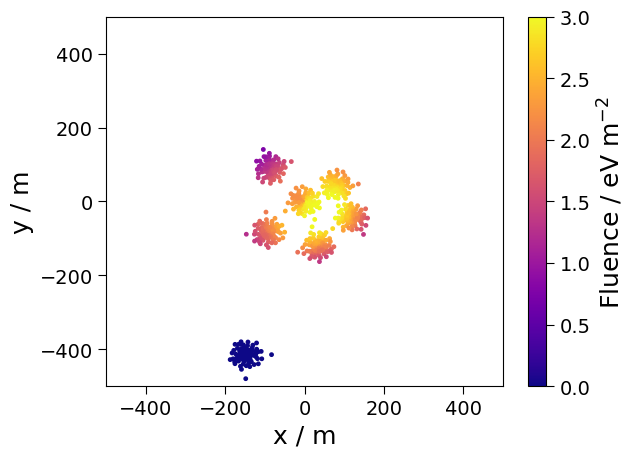

In [24]:
 # plot the footprint
fig, ax = plt.subplots()

sc = ax.scatter(positions[:, 0], positions[:, 1], c = fluences, cmap=fluence_cmap, norm=fluence_norm, s=6.0)
ax.tick_params(axis='both', which='major', labelsize=14, size=6)
ax.tick_params(axis='both', which='minor', labelsize=14, size=4)

ax.set_xlabel("x / m", fontsize=18)
ax.set_ylabel("y / m", fontsize=18)

cbar = fig.colorbar(sc, ax=ax)
cbar.ax.set_ylabel("Fluence / eV m$^{-2}$", fontsize=18)
cbar.ax.tick_params(axis='both', which='major', labelsize=14, size=6)

ax.set_xlim([-500, 500])
ax.set_ylim([-500, 500])

# axins = ax.inset_axes(
#     [300, 300, 250, 250],
#     transform=ax.transData,
#     xlim=(0, 200),
#     ylim=(0, 200),
#     # xticklabels=[],
#     # yticklabels=[],
# )
# axins.tick_params(axis='both', which='major', labelsize=12, size=6)
# axins.tick_params(axis='both', which='minor', labelsize=12, size=4)
# axins.scatter(positions[:,0], positions[:,1], c=fluences, cmap=fluence_cmap, norm=fluence_norm, s=20.0)

# axins.ticklabel_format(useMathText=True)
# axins.yaxis.get_offset_text().set_size(12)
# ax.indicate_inset_zoom(axins, edgecolor="k")

# fig.savefig(f"./footprint_{detector}.png", dpi=300, bbox_inches="tight")